In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib as mpl
import metpy.calc as mpcalc
from metpy.units import units
import pytz
from datetime import datetime, timedelta

mpl.rcParams['timezone'] = 'US/Pacific'
mpl.rcParams['text.latex.preamble'] = [r'\boldmath']

In [2]:
def rmse(y, y_pred):
    return np.sqrt(np.mean(np.square(y - y_pred)))

In [3]:
#######################################################################################
####### Reading in the RAWS and WRF station netcdf files with xarray ##################
#######################################################################################

jg_raws = xr.open_dataset('jarbo_gap_RAWS.nc')
jg_wrf = xr.open_dataset('Final_Jarbo_gap_timeseries.nc')

######## Slicing the long RAWS file to only the time period I care about.... about 6 hours into the WRF run to avoid the "spin up time"
jg_raws = jg_raws.sel(time=slice(jg_wrf.Time[0], jg_wrf.Time[-70]))
jg_wrf = jg_wrf.sel(Time=slice(jg_wrf.Time[0], jg_wrf.Time[-72]))

jg_wrf = jg_wrf.resample(Time='1H').mean() ### Resampling the data to one hour averages to match the RAWS data

# Calculating wind speed and direction using metpy
wspd = mpcalc.wind_speed(jg_wrf.u10,jg_wrf.v10 )   
wdir = mpcalc.wind_direction(jg_wrf.u10,jg_wrf.v10)
jg_wrf['wspd'] = np.array(wspd).squeeze()  ## putting these data back into the dataframe
jg_wrf['wdir'] = np.array(wdir).squeeze()

# I'm taking the UTC time from both the 1 hour RAWS and 10min WRF output and converting it to US/Pacific time
jg_t = jg_wrf.Time.to_index().tz_localize('UTC').tz_convert('US/Pacific') ### Taking the 
jg_ts = jg_raws.time.to_index().tz_localize('UTC').tz_convert('US/Pacific')

#####################################################################################################
### Openshaw

os_raws = xr.open_dataset('openshaw_RAWS.nc')
os_wrf = xr.open_dataset('Final_Openshaw_timeseries.nc')

######## Slicing the long RAWS file to only the time period I care about.... about 6 hours into the WRF run to avoid the "spin up time"
os_raws = os_raws.sel(time=slice(os_wrf.Time[0], os_wrf.Time[-1]))
os_wrf = os_wrf.sel(Time=slice(os_wrf.Time[6], os_wrf.Time[-1]))

os_wrf = os_wrf.resample(Time='1H').mean() ### Resampling the data to one hour averages to match the RAWS data

# Calculating wind speed and direction using metpy
wspd = mpcalc.wind_speed(os_wrf.u10,os_wrf.v10 )   
wdir = mpcalc.wind_direction(os_wrf.u10,os_wrf.v10)
os_wrf['wspd'] = np.array(wspd).squeeze()  ## putting these data back into the dataframe
os_wrf['wdir'] = np.array(wdir).squeeze()

# I'm taking the UTC time from both the 1 hour RAWS and 10min WRF output and converting it to US/Pacific time
os_t = os_wrf.Time.to_index().tz_localize('UTC').tz_convert('US/Pacific') ### Taking the 
os_ts = os_raws.time.to_index().tz_localize('UTC').tz_convert('US/Pacific')

#####################################################################################################
### Stirling City
sc_raws = xr.open_dataset('sterling_city_RAWS.nc')
sc_wrf = xr.open_dataset('Final_stirling_city_timeseries.nc')

######## Slicing the long RAWS file to only the time period I care about.... about 6 hours into the WRF run to avoid the "spin up time"
sc_raws = sc_raws.sel(time=slice(sc_wrf.Time[0], sc_wrf.Time[-1]))
sc_wrf = sc_wrf.sel(Time=slice(sc_wrf.Time[0], sc_wrf.Time[-1]))

sc_raws.wspd.values[193] = (sc_raws.wspd.values[194]+sc_raws.wspd.values[192])/2
sc_raws.wdir.values[-2] = (sc_raws.wdir.values[-1]+sc_raws.wdir.values[-3])/2
sc_raws = sc_raws.resample(time='1H').mean() ### Resampling the data to one hour averages to match the RAWS data
sc_wrf = sc_wrf.resample(Time='1H').mean() ### Resampling the data to one hour averages to match the RAWS data
# Calculating wind speed and direction using metpy
wspd = mpcalc.wind_speed(sc_wrf.u10*units('m/s'),sc_wrf.v10*units('m/s') )   
wdir = mpcalc.wind_direction(sc_wrf.u10*units('m/s'),sc_wrf.v10*units('m/s'))
sc_wrf['wspd'] = np.array(wspd).squeeze()  ## putting these data back into the dataframe
sc_wrf['wdir'] = np.array(wdir).squeeze()

# I'm taking the UTC time from both the 1 hour RAWS and 10min WRF output and converting it to US/Pacific time
sc_t = sc_wrf.Time.to_index().tz_localize('UTC').tz_convert('US/Pacific') ### Taking the 
sc_ts = sc_raws.time.to_index().tz_localize('UTC').tz_convert('US/Pacific')

#####################################################################################################
### Redhill

rh_raws = xr.open_dataset('PG129_Red_Hill_Lookout_RAWS.nc')
rh_wrf = xr.open_dataset('Final_PG129_timeseries.nc')


######## Slicing the long RAWS file to only the time period I care about.... about 6 hours into the WRF run to avoid the "spin up time"
rh_raws = rh_raws.sel(time=slice(rh_wrf.Time[0], rh_wrf.Time[-1]))
rh_wrf = rh_wrf.sel(Time=slice(rh_wrf.Time[0], rh_wrf.Time[-1]))
rh_wrf = rh_wrf.resample(Time='1H').mean() ### Resampling the data to one hour averages to match the RAWS data
rh_raws = rh_raws.resample(time='1H').mean() ### Resampling the data to one hour averages to match the RAWS data
# Calculating wind speed and direction using metpy
wspd = mpcalc.wind_speed(rh_wrf.u10*units('m/s'),rh_wrf.v10*units('m/s') )   
wdir = mpcalc.wind_direction(rh_wrf.u10*units('m/s'),rh_wrf.v10*units('m/s'))
rh_wrf['wspd'] = np.array(wspd).squeeze()  ## putting these data back into the dataframe
rh_wrf['wdir'] = np.array(wdir).squeeze()

# I'm taking the UTC time from both the 1 hour RAWS and 10min WRF output and converting it to US/Pacific time
rh_t = rh_wrf.Time.to_index().tz_localize('UTC').tz_convert('US/Pacific') ### Taking the 
rh_ts = rh_raws.time.to_index().tz_localize('UTC').tz_convert('US/Pacific')

#####################################################################################################
### Humbug

hb_raws = xr.open_dataset('Humbug_RAWS.nc')
hb_wrf = xr.open_dataset('Final_Humbug_timeseries.nc')


######## Slicing the long RAWS file to only the time period I care about.... about 6 hours into the WRF run to avoid the "spin up time"
hb_raws = hb_raws.sel(time=slice(hb_wrf.Time[0], hb_wrf.Time[-1]))
hb_wrf = hb_wrf.sel(Time=slice(hb_wrf.Time[0], hb_wrf.Time[-1]))

hb_wrf = hb_wrf.resample(Time='1H').mean() ### Resampling the data to one hour averages to match the RAWS data
# Calculating wind speed and direction using metpy
wspd = mpcalc.wind_speed(hb_wrf.u10*units('m/s'),hb_wrf.v10*units('m/s') )   
wdir = mpcalc.wind_direction(hb_wrf.u10*units('m/s'),hb_wrf.v10*units('m/s'))
hb_wrf['wspd'] = np.array(wspd).squeeze()  ## putting these data back into the dataframe
hb_wrf['wdir'] = np.array(wdir).squeeze()

# I'm taking the UTC time from both the 1 hour RAWS and 10min WRF output and converting it to US/Pacific time
hb_t = hb_wrf.Time.to_index().tz_localize('UTC').tz_convert('US/Pacific') ### Taking the 
hb_ts = hb_raws.time.to_index().tz_localize('UTC').tz_convert('US/Pacific')

#####################################################################################################
### Humbug

cb_raws = xr.open_dataset('Colby_mtn_RAWS.nc')
cb_wrf = xr.open_dataset('Final_Colby_timeseries.nc')


######## Slicing the long RAWS file to only the time period I care about.... about 6 hours into the WRF run to avoid the "spin up time"
cb_raws = cb_raws.sel(time=slice(cb_wrf.Time[0], cb_wrf.Time[-1]))
cb_wrf = cb_wrf.sel(Time=slice(cb_wrf.Time[0],cb_wrf.Time[-1]))

cb_wrf = cb_wrf.resample(Time='1H').mean() ### Resampling the data to one hour averages to match the RAWS data
# Calculating wind speed and direction using metpy
wspd = mpcalc.wind_speed(cb_wrf.u10*units('m/s'),cb_wrf.v10*units('m/s') )   
wdir = mpcalc.wind_direction(cb_wrf.u10*units('m/s'),cb_wrf.v10*units('m/s'))
cb_wrf['wspd'] = np.array(wspd).squeeze()  ## putting these data back into the dataframe
cb_wrf['wdir'] = np.array(wdir).squeeze()

# I'm taking the UTC time from both the 1 hour RAWS and 10min WRF output and converting it to US/Pacific time
cb_t = cb_wrf.Time.to_index().tz_localize('UTC').tz_convert('US/Pacific') ### Taking the 
cb_ts = cb_raws.time.to_index().tz_localize('UTC').tz_convert('US/Pacific')

#####################################################################################################
### saddleback

sb_raws = xr.open_dataset('Saddleback_RAWS.nc')
sb_wrf = xr.open_dataset('Final_Saddleback_timeseries.nc')


######## Slicing the long RAWS file to only the time period I care about.... about 6 hours into the WRF run to avoid the "spin up time"
sb_raws = sb_raws.sel(time=slice(sb_wrf.Time[0], sb_wrf.Time[-1]))
sb_wrf = sb_wrf.sel(Time=slice(sb_wrf.Time[0],sb_wrf.Time[-1]))

sb_wrf = sb_wrf.resample(Time='1H').mean() ### Resampling the data to one hour averages to match the RAWS data
# Calculating wind speed and direction using metpy
wspd = mpcalc.wind_speed(sb_wrf.u10*units('m/s'),sb_wrf.v10*units('m/s') )   
wdir = mpcalc.wind_direction(sb_wrf.u10*units('m/s'),sb_wrf.v10*units('m/s'))
sb_wrf['wspd'] = np.array(wspd).squeeze()  ## putting these data back into the dataframe
sb_wrf['wdir'] = np.array(wdir).squeeze()

# I'm taking the UTC time from both the 1 hour RAWS and 10min WRF output and converting it to US/Pacific time
sb_t = sb_wrf.Time.to_index().tz_localize('UTC').tz_convert('US/Pacific') ### Taking the 
sb_ts = sb_raws.time.to_index().tz_localize('UTC').tz_convert('US/Pacific')

C:\Users\Matthew\Miniconda3\envs\research\lib\site-packages\xarray\core\nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)
C:\Users\Matthew\Miniconda3\envs\research\lib\site-packages\xarray\core\nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


C:\Users\Matthew\Miniconda3\envs\research\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\Users\Matthew\Miniconda3\envs\research\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: parsing timezone aware datetimes is deprecated; this will raise an error in the future


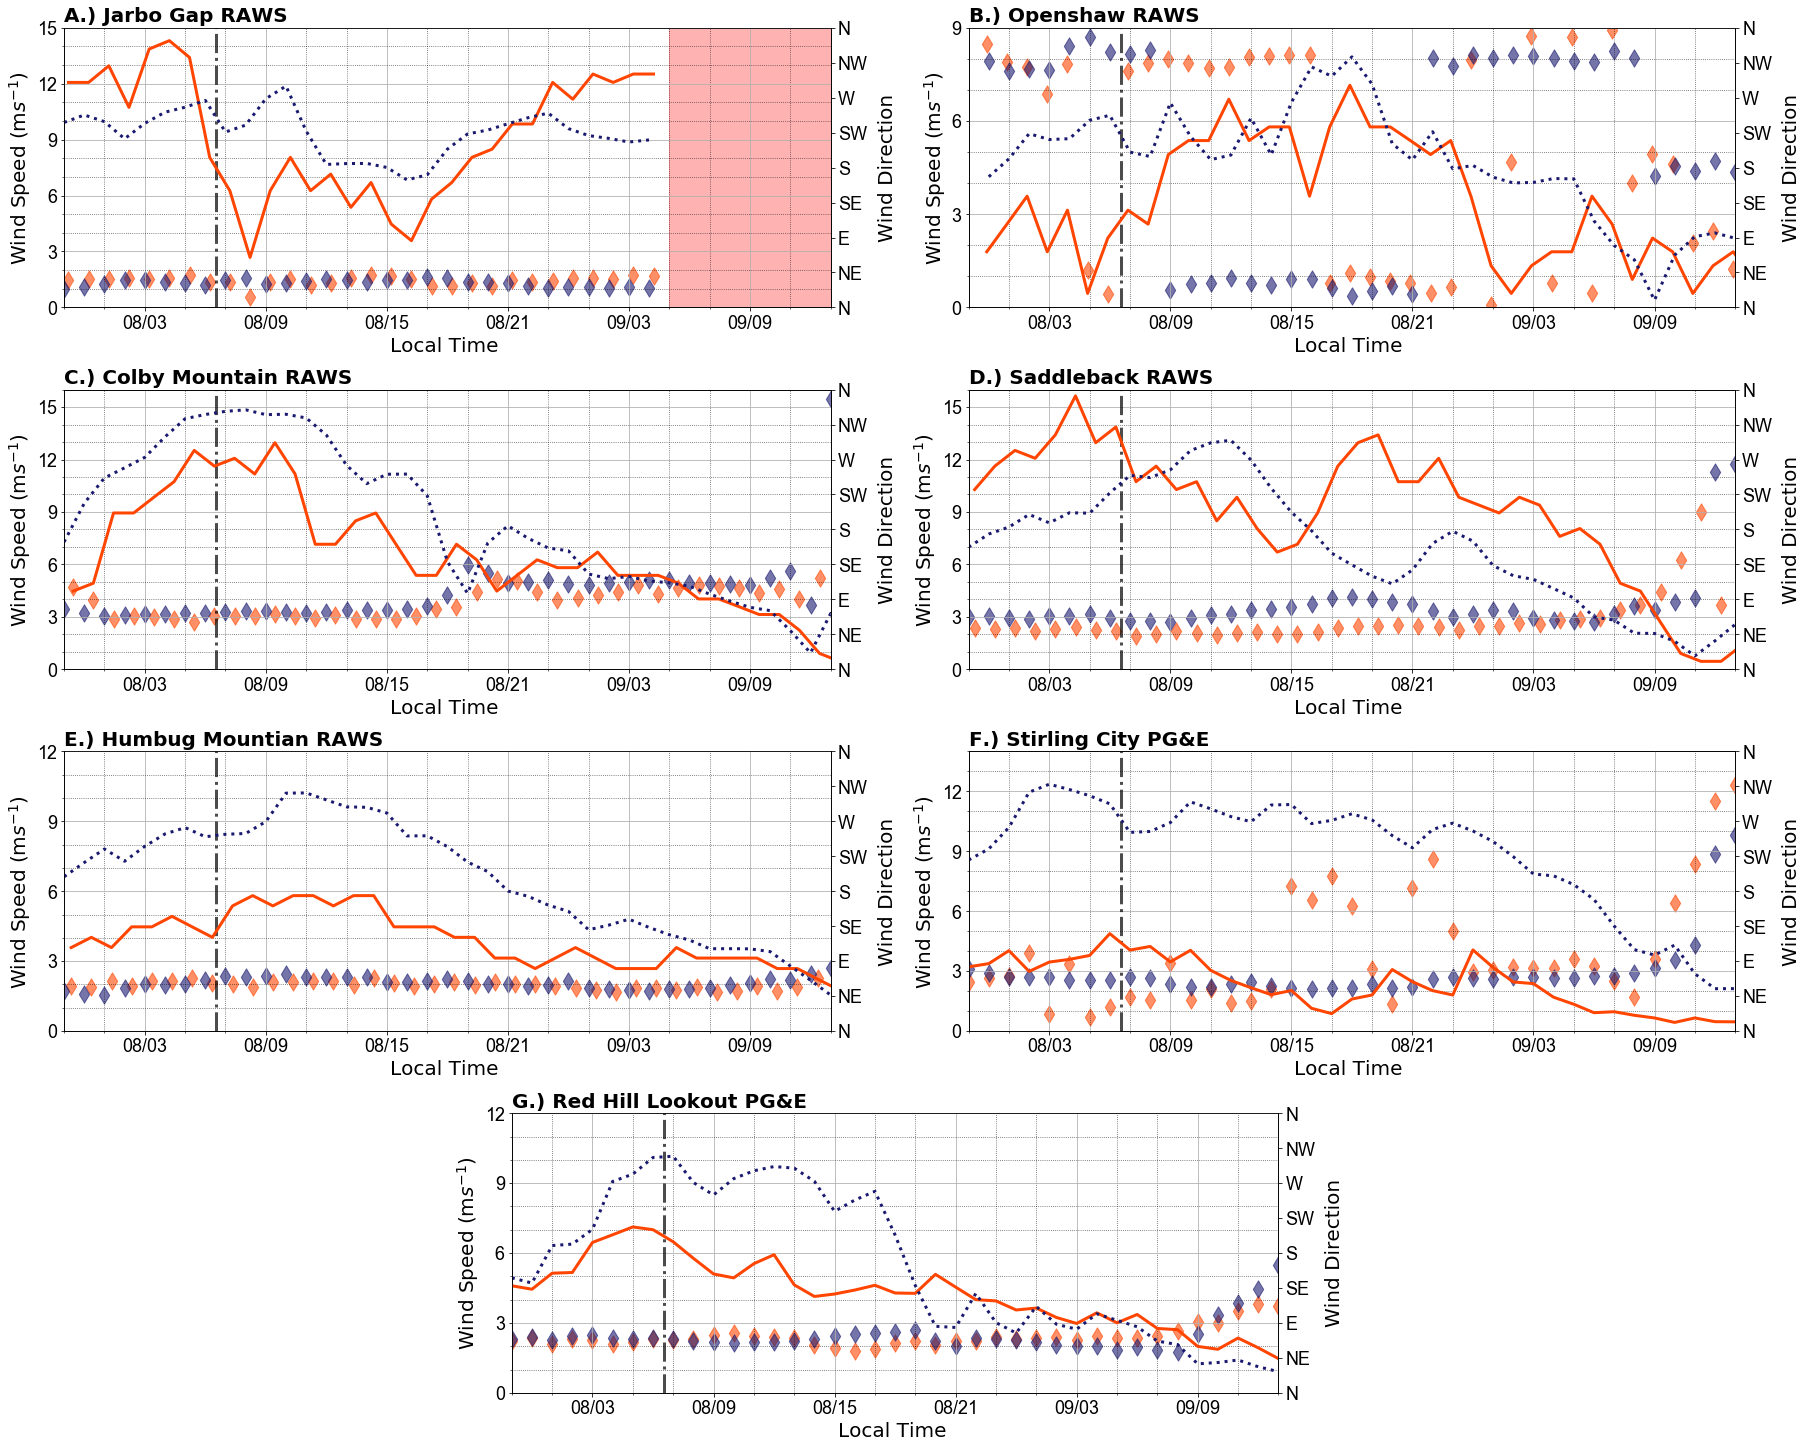

In [4]:
fig= plt.figure(figsize = (25,20),constrained_layout=True)
gs = fig.add_gridspec(4, 4)
ax = plt.subplot(gs[0, :2])
ax1 = plt.subplot(gs[0, 2:])
ax2 = plt.subplot(gs[1, :2])
ax3 = plt.subplot(gs[1, 2:])
ax4 = plt.subplot(gs[2, :2])
ax5 = plt.subplot(gs[2, 2:])
ax6 = plt.subplot(gs[3, 1:3])

ax.axvline(np.datetime64('2018-11-08 06:33:00')+ np.timedelta64(8, 'h'), color = 'k', ls = '-.', linewidth = 3, alpha = .7)
ax1.axvline(np.datetime64('2018-11-08 06:33:00')+ np.timedelta64(8, 'h'), color = 'k', ls = '-.', linewidth = 3, alpha = .7)
ax2.axvline(np.datetime64('2018-11-08 06:33:00')+ np.timedelta64(8, 'h'), color = 'k', ls = '-.', linewidth = 3, alpha = .7)
ax3.axvline(np.datetime64('2018-11-08 06:33:00')+ np.timedelta64(8, 'h'), color = 'k', ls = '-.', linewidth = 3, alpha = .7)
ax4.axvline(np.datetime64('2018-11-08 06:33:00')+ np.timedelta64(8, 'h'), color = 'k', ls = '-.', linewidth = 3, alpha = .7)
ax5.axvline(np.datetime64('2018-11-08 06:33:00')+ np.timedelta64(8, 'h'), color = 'k', ls = '-.', linewidth = 3, alpha = .7)
ax6.axvline(np.datetime64('2018-11-08 06:33:00')+ np.timedelta64(8, 'h'), color = 'k', ls = '-.', linewidth = 3, alpha = .7)


###########################################################################################################################################################################
ax.axvspan(np.datetime64('2018-11-09 05:00:00')+ np.timedelta64(8, 'h'), np.datetime64('2018-11-09 12:00:00-08:00')+ np.timedelta64(8, 'h'), color = 'red', alpha = .3)
ax.plot(jg_raws.time,jg_raws.wspd,  linewidth = 3, color = 'orangered')
ax.plot(jg_wrf.Time.data, jg_wrf.wspd,ls=':', color = 'midnightblue', linewidth = 3)
ax.set_ylabel('Wind Speed (m$s^{-1}$)',fontsize = 20)
ax.set_xlabel('Local Time ', fontsize = 20)
ax.set_ylim(0,15)

ax_= ax.twinx()
ax_.scatter(pd.to_datetime(jg_raws.time.data),jg_raws.wdir, s=150,marker = 'd', color = 'orangered', alpha = .6)
ax_.scatter(pd.to_datetime(jg_wrf.Time.data),jg_wrf.wdir, s=150,marker = 'd',  color = 'midnightblue', alpha = .6)
### formatting the second axis to be from 0-360 then replacing the labels with directions
ax_.set_ylim(0,360)
ax_.set_ylabel('Wind Direction', fontsize = 20,  labelpad = 10)
ax_.set_yticklabels(["",'N',"NE", "E", "SE", "S", "SW", "W", "NW", "N"])

#handling the legends
#fig.legend( fontsize = 18, ncol = 3,bbox_to_anchor= (.97,1.03))
ax.set_title('A.) Jarbo Gap RAWS', fontweight = 'bold', fontsize = 20, loc = 'left')

for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18);
for label in (ax_.get_xticklabels() + ax_.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18)
    

ax.set_xlim('2018-11-07 23:00:00-08:00', '2018-11-09 13:00:00-08:00')
ax.xaxis.set_major_locator(dates.HourLocator(interval=6))
ax.xaxis.set_minor_locator(dates.HourLocator(interval = 2))
ax.xaxis.set_major_formatter(dates.DateFormatter('%d/%H'))

ax.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base = 3))
ax.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(base = 1))
ax_.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base=45.0))

ax.grid()
ax.grid(which = 'minor',color = 'k', alpha = .7, ls = ':')

ax.set_zorder(10)
ax.patch.set_visible(False)
ax_.patch.set_visible(True)

####################################################################################################################################################
ax1.plot(os_raws.time,os_raws.wspd, linewidth = 3, color = 'orangered')
ax1.plot(os_wrf.Time.data, os_wrf.wspd,ls=':', color = 'midnightblue', linewidth = 3)
ax1.set_ylabel('Wind Speed (m$s^{-1}$)',fontsize = 20)
ax1.set_xlabel('Local Time ', fontsize = 20)
ax1.set_ylim(0,9)

ax1_= ax1.twinx()
ax1_.scatter(pd.to_datetime(os_raws.time.data),os_raws.wdir, s=150,marker = 'd', color = 'orangered', alpha = .6)
ax1_.scatter(pd.to_datetime(os_wrf.Time.data),os_wrf.wdir, s=150,marker = 'd', color = 'midnightblue', alpha = .6)
### formatting the second ax1is to be from 0-360 then replacing the labels with directions
ax1_.set_ylim(0,360)
ax1_.set_ylabel('Wind Direction', fontsize = 20,  labelpad = 10)
ax1_.set_yticklabels(["",'N',"NE", "E", "SE", "S", "SW", "W", "NW", "N"])

ax1.set_title('B.) Openshaw RAWS', fontweight = 'bold', fontsize = 20, loc = 'left')


for label in (ax1.get_xticklabels() + ax1.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18);
for label in (ax1_.get_xticklabels() + ax1_.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18)
    

ax1.set_xlim('2018-11-07 23:00:00-08:00', '2018-11-09 13:00:00-08:00')
ax1.xaxis.set_major_locator(dates.HourLocator(interval=6))
ax1.xaxis.set_minor_locator(dates.HourLocator(interval = 2))
ax1.xaxis.set_major_formatter(dates.DateFormatter('%d/%H'))

ax1.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base = 3))
ax1.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(base = 1))
ax1_.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base=45.0))

ax1.grid()
ax1.grid(which = 'minor',color = 'k', alpha = .7, ls = ':')

ax1.set_zorder(10)
ax1.patch.set_visible(False)
ax1_.patch.set_visible(True)
####################################################################################################################################################
ax2.plot(cb_raws.time,cb_raws.wspd, linewidth = 3, color = 'orangered')
ax2.plot(cb_wrf.Time.data, cb_wrf.wspd,linewidth = 3,ls=':', color = 'midnightblue')
ax2.set_ylabel('Wind Speed (m$s^{-1}$)',fontsize = 20)
ax2.set_xlabel('Local Time ', fontsize = 20)
ax2.set_ylim(0,16)

ax2_= ax2.twinx()
ax2_.scatter(pd.to_datetime(cb_raws.time.data),cb_raws.wdir, s=150,marker = 'd',  color = 'orangered', alpha = .6)
ax2_.scatter(pd.to_datetime(cb_wrf.Time.data),cb_wrf.wdir, s=150,marker = 'd',  color = 'midnightblue', alpha = .6)
### formatting the second ax2is to be from 0-360 then replacing the labels with directions
ax2_.set_ylim(0,360)
ax2_.set_ylabel('Wind Direction', fontsize = 20,  labelpad = 10)
ax2_.set_yticklabels(["",'N',"NE", "E", "SE", "S", "SW", "W", "NW", "N"])

ax2.set_title('C.) Colby Mountain RAWS', fontweight = 'bold', fontsize = 20, loc = 'left')


for label in (ax2.get_xticklabels() + ax2.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18);
for label in (ax2_.get_xticklabels() + ax2_.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18)
    

ax2.set_xlim('2018-11-07 23:00:00-08:00', '2018-11-09 13:00:00-08:00')
ax2.xaxis.set_major_locator(dates.HourLocator(interval=6))
ax2.xaxis.set_minor_locator(dates.HourLocator(interval = 2))
ax2.xaxis.set_major_formatter(dates.DateFormatter('%d/%H'))

ax2.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base = 3))
ax2.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(base = 1))
ax2_.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base=45.0))

ax2.grid()
ax2.grid(which = 'minor',color = 'k', alpha = .7, ls = ':')

ax2.set_zorder(10)
ax2.patch.set_visible(False)
ax2_.patch.set_visible(True)

####################################################################################################################################################
ax3.plot(sb_raws.time,sb_raws.wspd,  linewidth = 3, color = 'orangered')
ax3.plot(sb_wrf.Time.data, sb_wrf.wspd, ls=':',linewidth = 3,  color = 'midnightblue')
ax3.set_ylabel('Wind Speed (m$s^{-1}$)',fontsize = 20)
ax3.set_xlabel('Local Time ', fontsize = 20)
ax3.set_ylim(0,16)

ax3_= ax3.twinx()
ax3_.scatter(pd.to_datetime(sb_raws.time.data),sb_raws.wdir, s=150,marker = 'd', color = 'orangered', alpha = .6)
ax3_.scatter(pd.to_datetime(sb_wrf.Time.data),sb_wrf.wdir, s=150,marker = 'd', color = 'midnightblue', alpha = .6)
### formatting the second ax3is to be from 0-360 then replacing the labels with directions
ax3_.set_ylim(0,360)
ax3_.set_ylabel('Wind Direction', fontsize = 20,  labelpad = 10)
ax3_.set_yticklabels(["",'N',"NE", "E", "SE", "S", "SW", "W", "NW", "N"])

ax3.set_title('D.) Saddleback RAWS', fontweight = 'bold', fontsize = 20, loc = 'left')


for label in (ax3.get_xticklabels() + ax3.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18);
for label in (ax3_.get_xticklabels() + ax3_.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18)
    

ax3.set_xlim('2018-11-07 23:00:00-08:00', '2018-11-09 13:00:00-08:00')
ax3.xaxis.set_major_locator(dates.HourLocator(interval=6))
ax3.xaxis.set_minor_locator(dates.HourLocator(interval = 2))
ax3.xaxis.set_major_formatter(dates.DateFormatter('%d/%H'))

ax3.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base = 3))
ax3.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(base = 1))
ax3_.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base=45.0))

ax3.grid()
ax3.grid(which = 'minor',color = 'k', alpha = .7, ls = ':')
ax3.set_zorder(10)
ax3.patch.set_visible(False)
ax3_.patch.set_visible(True)

 
ax4.plot(hb_raws.time,hb_raws.wspd, linewidth = 3, color = 'orangered')
ax4.plot(hb_wrf.Time.data, hb_wrf.wspd,ls=':',linewidth = 3,  color = 'midnightblue')
ax4.set_ylabel('Wind Speed (m$s^{-1}$)',fontsize = 20)
ax4.set_xlabel('Local Time ', fontsize = 20)
ax4.set_ylim(0,12)

ax4_= ax4.twinx()
ax4_.scatter(pd.to_datetime(hb_raws.time.data),hb_raws.wdir, s=150,marker = 'd', color = 'orangered', alpha = .6)
ax4_.scatter(pd.to_datetime(hb_wrf.Time.data),hb_wrf.wdir, s=150,marker = 'd', color = 'midnightblue', alpha = .6)
### formatting the second ax4is to be from 0-360 then replacing the labels with directions
ax4_.set_ylim(0,360)
ax4_.set_ylabel('Wind Direction', fontsize = 20,  labelpad = 10)
ax4_.set_yticklabels(["",'N',"NE", "E", "SE", "S", "SW", "W", "NW", "N"])

ax4.set_title('E.) Humbug Mountian RAWS', fontweight = 'bold', fontsize = 20, loc = 'left')


for label in (ax4.get_xticklabels() + ax4.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18);
for label in (ax4_.get_xticklabels() + ax4_.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18)
    

ax4.set_xlim('2018-11-07 23:00:00-08:00', '2018-11-09 13:00:00-08:00')
ax4.xaxis.set_major_locator(dates.HourLocator(interval=6))
ax4.xaxis.set_minor_locator(dates.HourLocator(interval=2))
ax4.xaxis.set_major_formatter(dates.DateFormatter('%d/%H'))

ax4.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base = 3))
ax4.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(base = 1))
ax4_.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base=45.0))

ax4.grid()
ax4.grid(which = 'minor',color = 'k', alpha = .7, ls = ':')

ax4.set_zorder(10)
ax4.patch.set_visible(False)
ax4_.patch.set_visible(True)


ax5.plot(sc_raws.time,sc_raws.wspd, ls = '-', linewidth = 3, color = 'orangered')
ax5.plot(sc_wrf.Time.data, sc_wrf.wspd, ls=':',  color = 'midnightblue', linewidth = 3)
ax5.set_ylabel('Wind Speed (m$s^{-1}$)',fontsize = 20)
ax5.set_xlabel('Local Time ', fontsize = 20)
ax5.set_ylim(0,14)

ax5_= ax5.twinx()
ax5_.scatter(pd.to_datetime(sc_raws.time.data),sc_raws.wdir, s=150,marker = 'd', color = 'orangered', alpha = .6)
ax5_.scatter(pd.to_datetime(sc_wrf.Time.data),sc_wrf.wdir, s=150,marker = 'd',color = 'midnightblue', alpha = .6)
### formatting the second ax3is to be from 0-360 then replacing the labels with directions
ax5_.set_ylim(0,360)
ax5_.set_ylabel('Wind Direction', fontsize = 20,  labelpad = 10)
ax5_.set_yticklabels(["",'N',"NE", "E", "SE", "S", "SW", "W", "NW", "N"])

ax5.set_title('F.) Stirling City PG&E', fontweight = 'bold', fontsize = 20, loc = 'left')


for label in (ax5.get_xticklabels() + ax5.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18);
for label in (ax5_.get_xticklabels() + ax5_.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18)
    

ax5.set_xlim('2018-11-07 23:00:00-08:00', '2018-11-09 13:00:00-08:00')
ax5.xaxis.set_major_locator(dates.HourLocator(interval=6))
ax5.xaxis.set_minor_locator(dates.HourLocator(interval = 2))
ax5.xaxis.set_major_formatter(dates.DateFormatter('%d/%H'))

ax5.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base = 3))
ax5.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(base = 1))
ax5_.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base=45.0))

ax5.grid()
ax5.grid(which = 'minor',color = 'k', alpha = .7, ls = ':')
ax5.set_zorder(10)
ax5.patch.set_visible(False)
ax5_.patch.set_visible(True)


ax6.plot(rh_raws.time,rh_raws.wspd, ls = '-', linewidth = 3, color = 'orangered')
ax6.plot(rh_wrf.Time.data, rh_wrf.wspd,ls=':',linewidth = 3,  color = 'midnightblue')
ax6.set_ylabel('Wind Speed (m$s^{-1}$)',fontsize = 20)
ax6.set_xlabel('Local Time ', fontsize = 20)
ax6.set_ylim(0,12)

ax6_= ax6.twinx()
ax6_.scatter(pd.to_datetime(rh_raws.time.data),rh_raws.wdir, s=150,marker = 'd', color = 'orangered', alpha = .6)
ax6_.scatter(pd.to_datetime(rh_wrf.Time.data),rh_wrf.wdir, s=150,marker = 'd', color = 'midnightblue', alpha = .6)
### formatting the second ax4is to be from 0-360 then replacing the labels with directions
ax6_.set_ylim(0,360)
ax6_.set_ylabel('Wind Direction', fontsize = 20,  labelpad = 10)
ax6_.set_yticklabels(["",'N',"NE", "E", "SE", "S", "SW", "W", "NW", "N"])

ax6.set_title('G.) Red Hill Lookout PG&E', fontweight = 'bold', fontsize = 20, loc = 'left')


for label in (ax6.get_xticklabels() + ax6.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18);
for label in (ax6_.get_xticklabels() + ax6_.get_yticklabels()):
    label.set_fontname('Arial')
    label.set_fontsize(18)
    

ax6.set_xlim('2018-11-07 23:00:00-08:00', '2018-11-09 13:00:00-08:00')
ax6.xaxis.set_major_locator(dates.HourLocator(interval=6))
ax6.xaxis.set_minor_locator(dates.HourLocator(interval=2))
ax6.xaxis.set_major_formatter(dates.DateFormatter('%d/%H'))

ax6.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base = 3))
ax6.yaxis.set_minor_locator(mpl.ticker.MultipleLocator(base = 1))
ax6_.yaxis.set_major_locator(mpl.ticker.MultipleLocator(base=45.0))

ax6.grid()
ax6.grid(which = 'minor',color = 'k', alpha = .7, ls = ':')

ax6.set_zorder(10)
ax6.patch.set_visible(False)
ax6_.patch.set_visible(True)
plt.savefig('wrf_v_station.png', bbox_inches = 'tight', dpi = 300)

<Figure size 432x288 with 0 Axes>

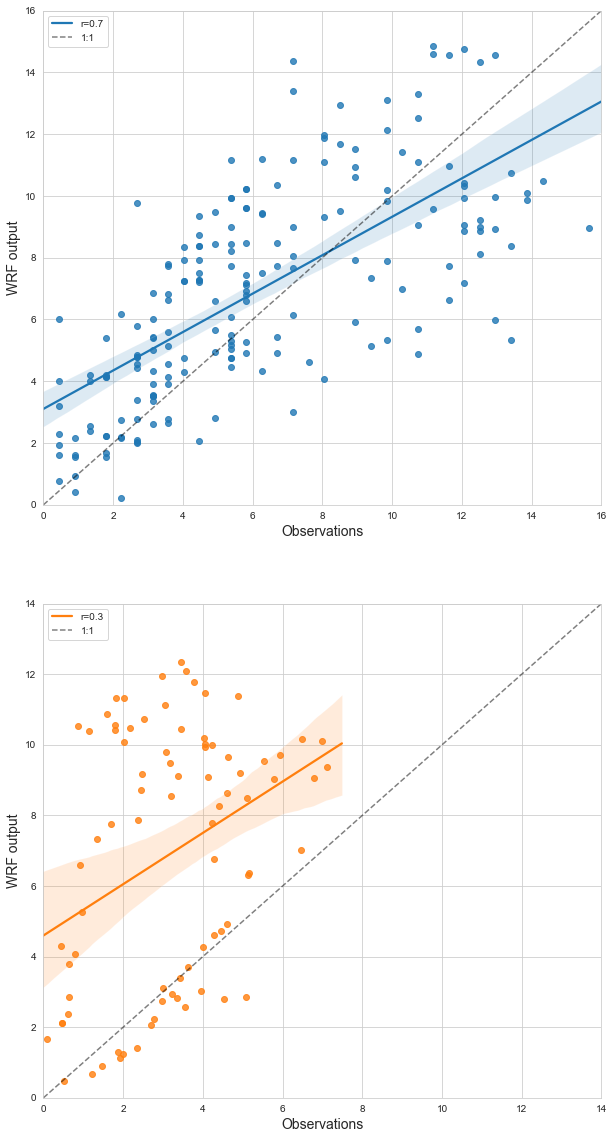

In [5]:
import seaborn as sns
from scipy import stats
sns.set_style("whitegrid")
sns.despine()
x=np.concatenate((jg_wrf.wspd.data.squeeze(),os_wrf.wspd.data.squeeze(),hb_wrf.wspd.data.squeeze(),sb_wrf.wspd.data.squeeze(),cb_wrf.wspd.data.squeeze()))
y=np.concatenate((jg_raws.wspd.data.squeeze(),os_raws.wspd.data.squeeze(),hb_raws.wspd.data.squeeze(),sb_raws.wspd.data.squeeze(),cb_raws.wspd.data.squeeze()))

xx=np.concatenate((sc_wrf.wspd.data.squeeze(),rh_wrf.wspd.data.squeeze()))
yy=np.concatenate((sc_raws.wspd.data.squeeze(),rh_raws.wspd.data.squeeze()))
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
_slope, _intercept, _r_value, _p_value, _std_err = stats.linregress(xx,yy)

fig, axs = plt.subplots(nrows=2,figsize=(10,20))

sns.regplot(x=y,y=x,ax=axs[0],line_kws={'label':"r={0:.1f}".format(r_value)})
#sns.regplot(x=xx,y=yy,axs[0]=axs[0],line_kws={'label':"r={0:.1f}".format(_r_value)}, color = 'red',marker="x")
axs[0].set_ylim(0,16)
axs[0].set_xlim(0,16)
axs[0].set_ylabel('WRF output', fontsize =14)
axs[0].set_xlabel('Observations', fontsize =14)
_x = np.linspace(*axs[0].get_xlim())
axs[0].plot(_x,_x,'k--', alpha = .5, label = '1:1')

# plot legend
axs[0].legend()

sns.regplot(x=yy, y=xx,ax=axs[1],line_kws={'label':"r={0:.1f}".format(_r_value)})
#sns.regplot(x=xx,y=yy,axs[0]=axs[0],line_kws={'label':"r={0:.1f}".format(_r_value)}, color = 'red',marker="x")
axs[1].set_ylim(0,14)
axs[1].set_xlim(0,14)
axs[1].set_ylabel('WRF output', fontsize =14)
axs[1].set_xlabel('Observations', fontsize =14)
_x = np.linspace(*axs[1].get_xlim())
axs[1].plot(_x,_x,'k--', alpha = .5, label = '1:1')
# plot legend
axs[1].legend()

plt.savefig('scatters_station_data.png', dpi =300)

In [6]:
print('Wind speed RMSE: ' + str(rmse(jg_wrf.wspd.data, jg_raws.wspd.data)))
print('Wind direction RMSE: ' + str(rmse(jg_wrf.wdir.data, jg_raws.wdir.data)))
print('')
print('Wind speed RMSE: ' + str(rmse(os_wrf.wspd.data, os_raws.wspd.data)))
print('Wind direction RMSE: ' + str(rmse(os_wrf.wdir.data, os_raws.wdir.data)))
print('')
print('Wind speed RMSE: ' + str(rmse(cb_wrf.wspd.data, cb_raws.wspd.data)))
print('Wind direction RMSE: ' + str(rmse(cb_wrf.wdir.data, cb_raws.wdir.data)))
print('')
print('Wind speed RMSE: ' + str(rmse(sb_wrf.wspd.data, sb_raws.wspd.data)))
print('Wind direction RMSE: ' + str(rmse(sb_wrf.wdir.data, sb_raws.wdir.data)))
print('')
print('Wind speed RMSE: ' + str(rmse(hb_wrf.wspd.data, hb_raws.wspd.data)))
print('Wind direction RMSE: ' + str(rmse(hb_wrf.wdir.data, hb_raws.wdir.data)))
print('')
print('Wind speed RMSE: ' + str(rmse(sc_wrf.wspd.data, sc_raws.wspd.data)))
print('Wind direction RMSE: ' + str(rmse(sc_wrf.wdir.data, sc_raws.wdir.data)))
print('')
print('Wind speed RMSE: ' + str(rmse(rh_wrf.wspd.data, rh_raws.wspd.data)))
print('Wind direction RMSE: ' + str(rmse(rh_wrf.wdir.data, rh_raws.wdir.data)))
print('')

Wind speed RMSE: 2.9513459934493724
Wind direction RMSE: 9.16045945889493

Wind speed RMSE: 2.0777047796834083
Wind direction RMSE: 186.87589296625367

Wind speed RMSE: 2.7394915244310725
Wind direction RMSE: 52.745474602243306

Wind speed RMSE: 3.6955883243239804
Wind direction RMSE: 39.93959155367566

Wind speed RMSE: 2.966770234389918
Wind direction RMSE: 34.15683653508118

Wind speed RMSE: 6.7703790932899794
Wind direction RMSE: 60.523003630071265

Wind speed RMSE: 2.3212590953926004
Wind direction RMSE: 15.808908676045062



In [7]:
(2.95+2.07+2.73+3.69+2.96+6.7+2.3)/7

3.3428571428571425

In [8]:
(9.16+186.87+52.74+39.93+34.15+60.52+15.8)/7

57.02428571428571

In [9]:
(2.95+2.07+2.73+3.69+2.96+2.3)/6

2.783333333333333

In [10]:
(9.16+52.74+39.93+34.15+60.52+15.8)/6

35.38333333333334